# Erasmus Mobility Dataset Analysis
An analysis of the student mobilities during the 2011-12 Erasmus exchange program.

Authors: [Guillermo Barreiro](https://www.linkedin.com/in/guillermobf/), [Hilke van Meurs](https://www.linkedin.com/in/hilke-van-meurs-06346010a)

*January 2020, Vienna*


## Loading and filtering the data

CSV dataset downloaded from the **European Union Data Portal**: http://data.europa.eu/euodp/en/data/storage/f/2015-03-13T153634/student_1112.csv

In [1]:
# Imports libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from statistics import mean
import seaborn as sns

# Sets up plotting
%matplotlib inline
mpl.style.use(['seaborn-pastel'])
figsize = (14, 8)
sns.set()

In [2]:
# Downloads and loads the dataset
records = pd.read_csv('http://data.europa.eu/euodp/en/data/storage/f/2015-03-13T153634/student_1112.csv', sep=';', decimal='.', low_memory=False, header = 0) # since the dataset is very large, the low_memory flag has to be set to False

In [3]:
# Filters the datasets => removes non-study mobilities and columns associated with them
records = records[records['MOBILITYTYPE'] =='S']
records = records.drop(columns=['MOBILITYTYPE', 'PLACEMENTENTERPRISE', 'COUNTRYOFPLACEMENT', 'ENTERPRISESIZE', 'TYPEPLACEMENTSECTOR', 'PLACEMENTGRANT', 'ECTSCREDITSPLACEMENT', 'ECTSCREDITSSTUDY', 'LENGTHPLACEMENT', 'PLACEMENTSTARTDATE'])

records.reset_index(inplace=True, drop=True)

records.head(10)

,HOMEINSTITUTION,COUNTRYCODEOFHOMEINSTITUTION,AGE,GENDER,NATIONALITY,SUBJECTAREA,LEVELSTUDY,YEARSPRIOR,HOSTINSTITUTION,COUNTRYCODEOFHOSTINSTITUTION,...,STUDYSTARTDATE,CONSORTIUMAGREEMENTNUMBER,TOTALECTSCREDITS,SNSUPPLEMENT,TAUGHTHOSTLANG,LANGUAGETAUGHT,LINGPREPARATION,STUDYGRANT,PREVIOUSPARTICIPATION,QUALIFICATIONATHOST
0,D BERLIN14,DE,27,F,DE,461,1,4,S JONKOPI01,SE,...,Aug-11,NaN,15,0.0,N,EN,HM,520.00,N,N
1,D BERLIN14,DE,27,F,XX,582,2,4,SF HELSINK41,FI,...,Oct-11,NaN,30,0.0,N,EN,HM,650.00,N,J
2,D BERLIN14,DE,24,F,DE,342,2,4,S JONKOPI01,SE,...,Aug-11,NaN,23,0.0,N,EN,HM,650.00,N,N
3,D BERLIN14,DE,28,M,DE,314,1,3,UK LONDON062,UK,...,Sep-11,NaN,27,0.0,Y,EN,HM,455.00,N,N
4,D BERLIN14,DE,22,F,DE,314,1,2,E TENERIF01,ES,...,Sep-11,NaN,47,0.0,Y,ES,HM,1300.00,N,N
5,D BERLIN14,DE,24,M,DE,314,2,4,IRLDUBLIN27,IE,...,Jan-12,NaN,20,0.0,Y,EN,HM,650.00,N,N
6,D BERLIN14,DE,28,F,DE,314,2,5,S GOTEBOR01,SE,...,Sep-11,NaN,58,0.0,N,EN,HM,1235.00,N,N
7,D BERLIN14,DE,23,M,DE,422,1,2,IRLDUNDALK01,IE,...,Sep-11,NaN,15,0.0,Y,EN,HM,585.00,N,N
8,D BERLIN14,DE,28,M,DE,481,2,5,TR ISTANBU16,TR,...,Jan-12,NaN,24,0.0,N,EN,HM,520.00,N,N
9,D BERLIN18,DE,26,F,DE,214,1,4,TR ISTANBU05,TR,...,Feb-12,NaN,30,0.0,Y,TR,NN,1162.08,N,N


## Data analysis: single variable

#### Age

In [4]:
ages = records['AGE']

# Calculates the average age of Erasmus students
mean_age = mean(ages)
print("Average age: %.2f" %mean_age)

# Calculates the standard deviation of the age of Erasmus students
stdev_age = np.std(ages)
print("Age standard deviation: %.2f" %stdev_age)

# Finds minimal age of Erasmus students
min_age = min(ages)
print("Minimum age: %d" %min_age)

# Finds maximum age of Erasmus students
max_age = max(ages)
print("Maximum age: %d" %max_age)

Average age: 22.46
Age standard deviation: 2.49
Minimum age: 17
Maximum age: 83


<AxesSubplot:title={'center':"Student's age"}, xlabel='Age', ylabel='Number of students'>

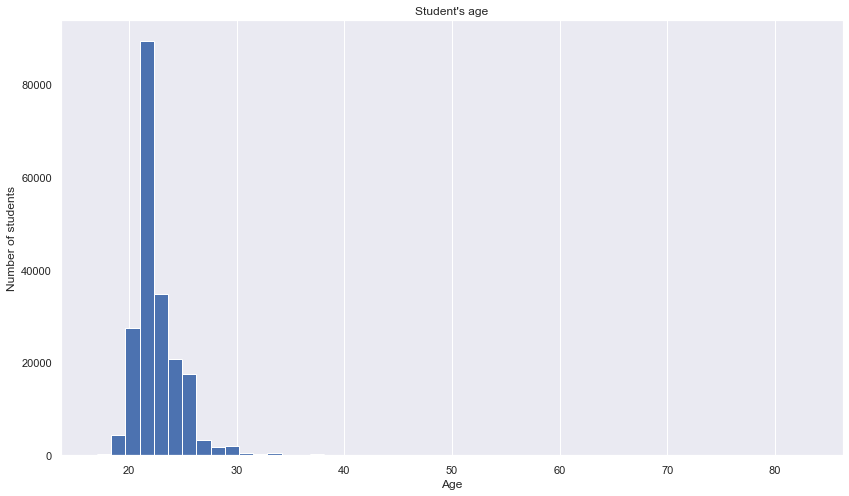

In [5]:
# Shows a histogram with the students' ages
fig_ages, axis_ages = plt.subplots(figsize=figsize) # creates an empty and abstract plot
axis_ages.hist(ages, bins = 50) # creates a histogram with the list 'ages' values
axis_ages.set_title('Student\'s age')
axis_ages.set_xlabel('Age')
axis_ages.set_ylabel('Number of students')
axis_ages.grid(axis='y')
axis_ages

#### Grant

In [6]:
# Calculates the average grant given to the Erasmus students
grants = records['STUDYGRANT']
print("Average grant: €%.2f" %mean(grants))

Average grant: €1464.06


In [7]:
# Calculates the standard deviation of the grant recieved for the Erasmus students
grants = records['STUDYGRANT']
stdev_grant = np.std(grants)
print("Standard deviation of the grant: €%.2f" %stdev_grant)

Standard deviation of the grant: €900.88


In [8]:
# Finds the highest grant
grants = records['STUDYGRANT']
max_grant = max(grants)
print("Highest grant: €%.2f" %max_grant)

Highest grant: €7730.00


In [9]:
# Finds the lowest grant
grants = records['STUDYGRANT']
min_grant = min(grants)
print("Lowest grant: €%.2f" %min_grant)

Lowest grant: €0.00


In [10]:
# Finds the lowest grant, skipping the students who didn't receive a grant
grants = (records[records['STUDYGRANT']>0])['STUDYGRANT']
min_grant_nonzero = min(grants)
print("Lowest grant (excluding 0.00): €%.2f" %min_grant_nonzero)

Lowest grant (excluding 0.00): €0.01


In [11]:
# Average monthly grant
grants = records['STUDYGRANT']
months = records['LENGTHSTUDYPERIOD']

grant_per_month = grants/months
avg_gpm = mean(grant_per_month)
print("Average monthly grant: €%.2f" %avg_gpm)

Average monthly grant: €243.73


In [13]:
# Standard deviation of the monthly grant
stdev_grantpm = np.std(grant_per_month)
print("Standard deviation of the monthly grant: €%.2f" %stdev_grantpm)

Standard deviation of the monthly grant: €129.11


<AxesSubplot:title={'center':'Monthly grants'}, xlabel='Money (in €)', ylabel='Number of students'>

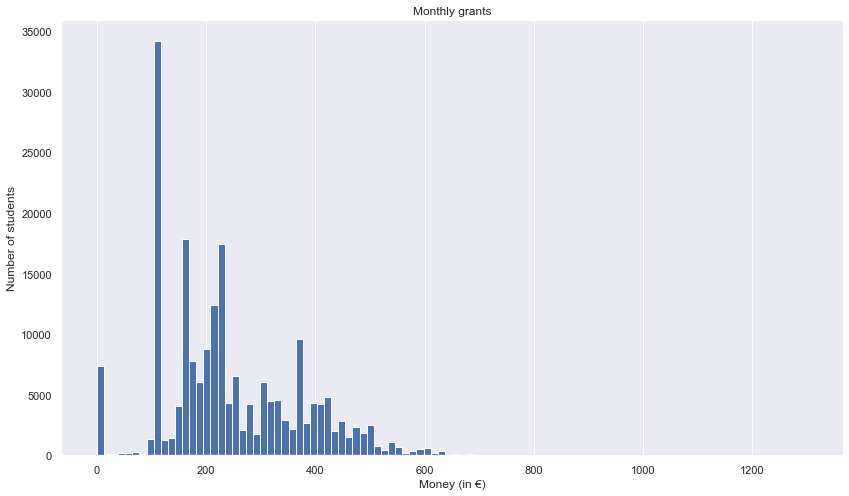

In [14]:
# Shows a histogram with the monthly grants
fig_grants, axis_grants = plt.subplots(figsize=figsize) # creates an empty and abstract plot
axis_grants.hist(grant_per_month, bins = 100) # creates a histogram with the list 'grant_per_month' values
axis_grants.set_title('Monthly grants')
axis_grants.set_xlabel('Money (in €)')
axis_grants.set_ylabel('Number of students')
axis_grants.grid(axis='y')
axis_grants

#### ECTS (study credits)

In [15]:
# Calculates the average number of ECTS per student
ects = records['TOTALECTSCREDITS']  
average_ECTS = mean(ects)
print("Average number of ECTS: %.2f" %average_ECTS) 

Average number of ECTS: 34.49


In [16]:
# Calculates the standard deviation of ECTS per student
ects = records['TOTALECTSCREDITS']  
stdev_ECTS = np.std(ects)
print("Standard deviation of the number of ECTS: %.2f" %stdev_ECTS) 

Standard deviation of the number of ECTS: 17.84


In [17]:
# Finds lowest number of ECTS
ects = records['TOTALECTSCREDITS']
minects = min(ects)
print("Lowest number of ECTS: %.1f" %minects) 

Lowest number of ECTS: 0.0


In [18]:
# Finds lowest number of ECTS, skipping null values
ects = (records[records['TOTALECTSCREDITS'] > 0])['TOTALECTSCREDITS']
minects_nonzero = min(ects)
print("Lowest number of ECTS (skipping null values): %.1f" %minects_nonzero) 

Lowest number of ECTS (skipping null values): 1.0


In [19]:
# Finds highest number of ECTS
ects = records['TOTALECTSCREDITS']
maxects = max(ects)
print("Highest number of ECTS: %.1f" %maxects) 

Highest number of ECTS: 90.0


<AxesSubplot:title={'center':'Received ECTS'}, xlabel='Number of ECTS', ylabel='Number of students'>

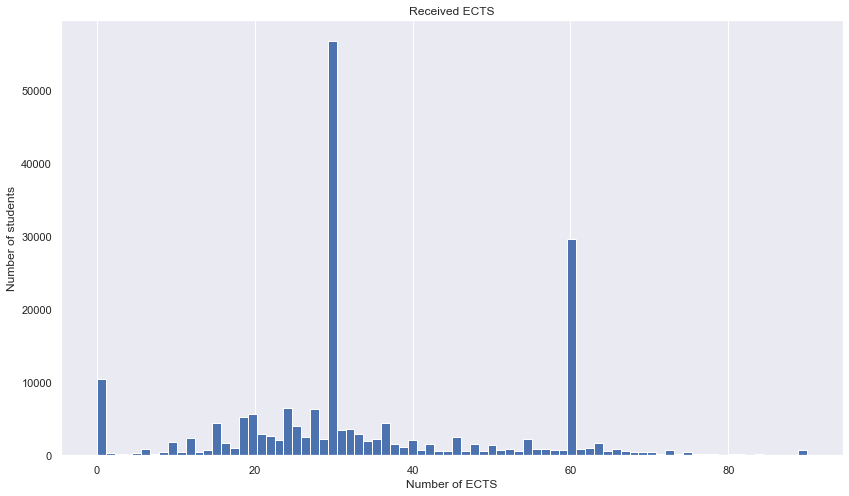

In [20]:
# Shows a histogram with the number of ECTS
fig_ects, axis_ects = plt.subplots(figsize=figsize) # creates an empty and abstract plot
axis_ects.hist(ects, bins = 80) # creates a histogram with the list 'ects' values
axis_ects.set_title('Received ECTS')
axis_ects.set_xlabel('Number of ECTS')
axis_ects.set_ylabel('Number of students')
axis_ects.grid(axis='y')
axis_ects

#### Exchange duration

Percentage of students staying only one semester: 65.15%
Percentage of students staying the whole year: 34.85%


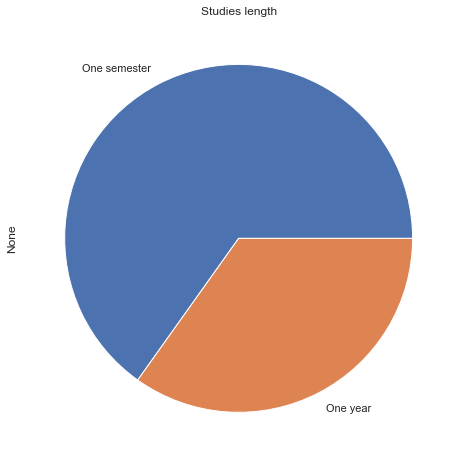

In [21]:
# Percentage of students staying only one semester
length_study = list(records['LENGTHSTUDYPERIOD'])
one_semester = records[records['LENGTHSTUDYPERIOD'] < 7.0]
one_semester_percentage = (len(one_semester)/len(length_study))*100
print("Percentage of students staying only one semester: %.2f%%" %one_semester_percentage)

# Percentage of students staying the whole year
whole_year_percentage = 100-one_semester_percentage
print("Percentage of students staying the whole year: %.2f%%" %whole_year_percentage)

# Plot it
study_length_percentages = {'One semester': one_semester_percentage, 'One year': whole_year_percentage}
pd.Series(study_length_percentages).plot(kind='pie', figsize=figsize)
plt.title('Studies length')
plt.show()

#### Gender

Percentage of female: 60.59%
Percentage of male: 39.41%


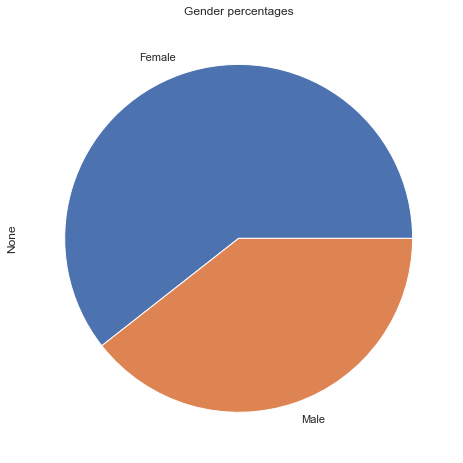

In [22]:
# Gender percentage
gender = records['GENDER'].value_counts()
female_count = gender['F']
male_count = gender['M']
total_count = male_count + female_count
female_percentage = (female_count/total_count)*100
male_percentage = (male_count/total_count)*100

print("Percentage of female: %.2f%%" %female_percentage)
print("Percentage of male: %.2f%%" %male_percentage)

# Plot it
gender_percentages = {'Female': female_percentage, 'Male': male_percentage}
pd.Series(gender_percentages).plot(kind='pie', figsize=figsize)
plt.title('Gender percentages')
plt.show()

#### Previous Erasmus

In [23]:
# Percentage of students who had already been in Erasmus
previous_participants = records['PREVIOUSPARTICIPATION']
previous_participants_repeating = previous_participants.value_counts()["S"]
repeating_percentage = (previous_participants_repeating/len(previous_participants))*100
print("Percentage of students repeating Erasmus: %.2f%%" %repeating_percentage)

Percentage of students repeating Erasmus: 0.11%


#### Study level

In [24]:
study_level = records['LEVELSTUDY'].value_counts()

# Percentage of students studying a Bachelor's degree
bachelors = study_level["1"]
bachelors_percentage = (bachelors/len(records))*100
print("Percentage of students doing a Bachelor's: %.2f%%" %bachelors_percentage)

# Percentage of students studying a Master's degree
masters = study_level["2"]
masters_percentage = (masters/len(records))*100
print("Percentage of students doing a Master's: %.2f%%" %masters_percentage)

# Percentage of students studying a PhD
phd = study_level["3"]
phd_percentage = (phd/len(records))*100
print("Percentage of students doing a PhD: %.2f%%" %phd_percentage)

Percentage of students doing a Bachelor's: 70.43%
Percentage of students doing a Master's: 28.22%
Percentage of students doing a PhD: 0.78%


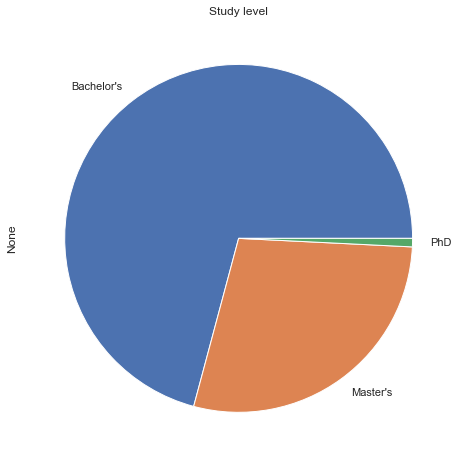

In [25]:
# Plot the percentages of study level
study_level_percentages = {'Bachelor\'s': bachelors_percentage, 'Master\'s': masters_percentage, 'PhD': phd_percentage}
pd.Series(study_level_percentages).plot(kind='pie', figsize=figsize)
plt.title('Study level')
plt.show()

#### Institutions

##### Top 10 sending institutions

E  GRANADA01    2006
E  MADRID03     1982
I  BOLOGNA01    1560
E  SEVILLA01    1512
E  VALENCI01    1426
E  VALENCI02    1259
I  ROMA01       1178
CZ PRAHA07      1132
I  PADOVA01     1092
PL WARSZAW01    1077
Name: HOMEINSTITUTION, dtype: int64


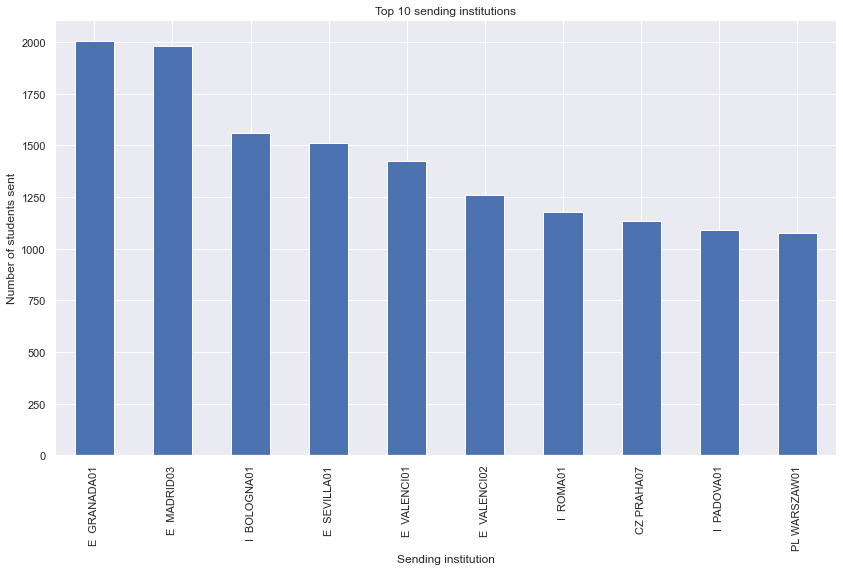

In [26]:
# Top 10 sending institutions
home_institution = records['HOMEINSTITUTION']
top_sending_institutions = home_institution.value_counts()[:10]
print(top_sending_institutions)

# Plot it
top_sending_institutions.plot(kind='bar', figsize=figsize)
plt.title("Top 10 sending institutions")
plt.xlabel('Sending institution')
plt.ylabel('Number of students sent')
plt.show()

##### Top 10 receiving institutions

E  GRANADA01    2048
E  SEVILLA01    1767
E  MADRID03     1706
I  BOLOGNA01    1687
E  VALENCI01    1684
E  VALENCI02    1505
CZ PRAHA07      1134
E  SALAMAN02    1108
I  ROMA01       1107
E  BARCELO01    1103
Name: HOSTINSTITUTION, dtype: int64


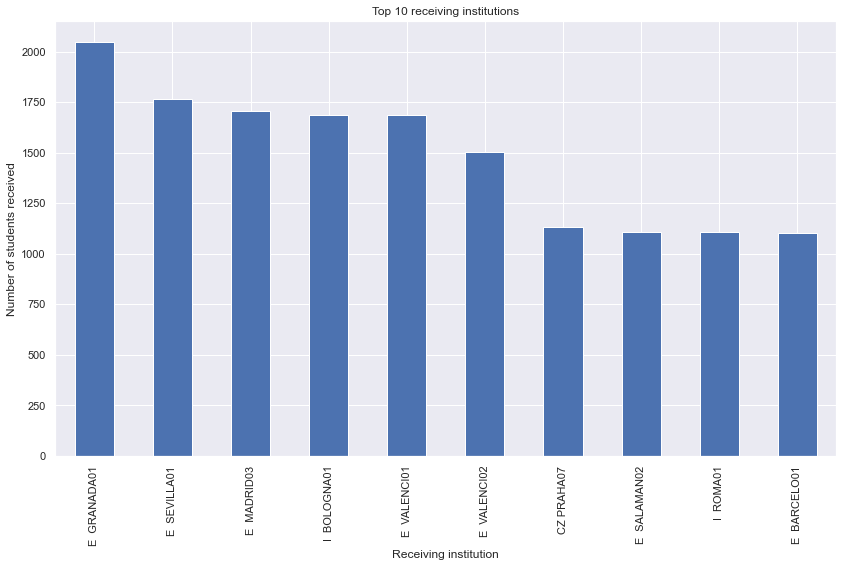

In [27]:
# Top 10 receiving institutions
host_institution = records['HOSTINSTITUTION']
top_receiving_institutions = host_institution.value_counts()[:10]
print(top_receiving_institutions)

# Plot it
top_receiving_institutions.plot(kind='bar', figsize=figsize)
plt.title("Top 10 receiving institutions")
plt.xlabel('Receiving institution')
plt.ylabel('Number of students received')
plt.show()

#### Language

##### Top 5 languages

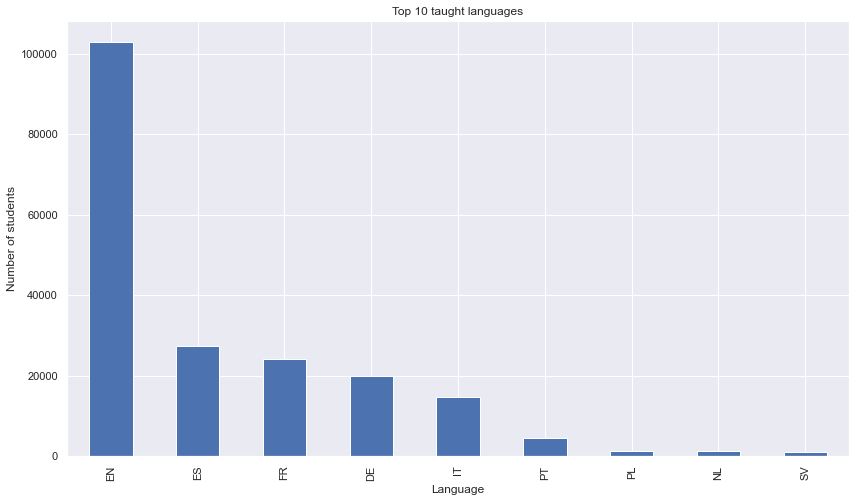

In [29]:
# Top 5 taught languages
taught_language = records['LANGUAGETAUGHT']
top_taught_languages = taught_language.value_counts()[:10]
top_taught_languages = top_taught_languages.drop(labels=['XX']) # drop "unknown language"

# Plot it
top_taught_languages.plot(kind='bar', figsize=figsize)
plt.title("Top 10 taught languages")
plt.xlabel('Language')
plt.ylabel('Number of students')
plt.show()

As we would expect, English is by far the most popular teaching language, with 103k students, followed by Spanish, with 27k, almost 4 times lower. Does this mean that in the UK and Ireland the percentage of Erasmus students taking their courses in English is much higher than in Spain taking them in Spanish, French in France and so on?

##### Percentage of students studying in the country official language

Percentage of people studying in the country official language: 57.29%
Percentage of people studying in a foreign language: 42.71%


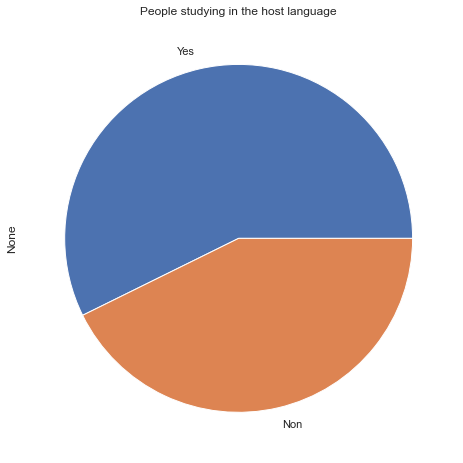

In [30]:
# Percentage taught in host language
host_language = list(records['TAUGHTHOSTLANG'])
host_language_yes = host_language.count("Y")
host_language_percentage = (host_language_yes/len(host_language))*100
non_host_language_percentage = 100 - host_language_percentage
print("Percentage of people studying in the country official language: %.2f%%" %host_language_percentage)
print("Percentage of people studying in a foreign language: %.2f%%" %non_host_language_percentage)

# Plot the percentages
host_language_percentages = {'Yes': host_language_percentage, 'Non': non_host_language_percentage}
pd.Series(host_language_percentages).plot(kind='pie', figsize=figsize)
plt.title('People studying in the host language')
plt.show()

##### Percentage of students studying in the local language for each country

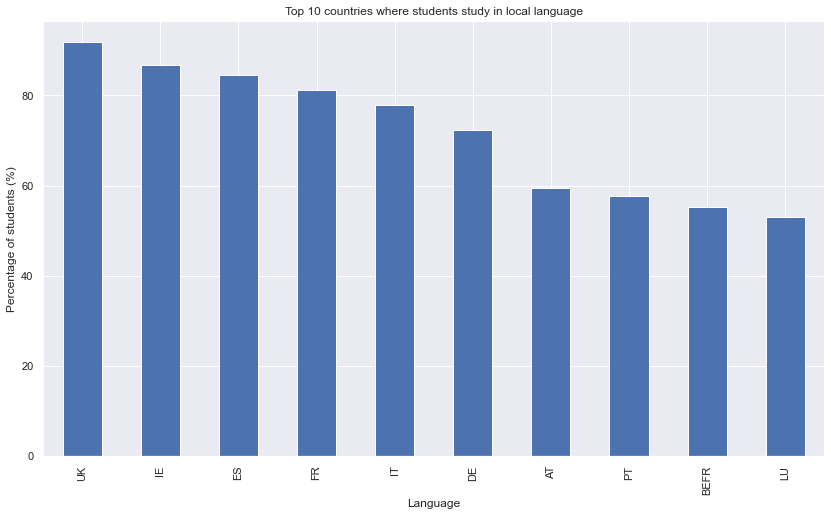

In [32]:
# Percentage of students studying in the host language for each country
number_students_per_country = records['COUNTRYCODEOFHOSTINSTITUTION'].value_counts()
students_taught_host_language = records[records['TAUGHTHOSTLANG']=='Y']
number_students_taught_host_language = students_taught_host_language['COUNTRYCODEOFHOSTINSTITUTION'].value_counts()

countries_host_language_percentage = 100*(number_students_taught_host_language/number_students_per_country)
countries_host_language_percentage = countries_host_language_percentage.sort_values(ascending=False)

# Plot the top 10
countries_host_language_percentage[:10].plot(kind='bar', figsize=figsize)
plt.title("Top 10 countries where students study in local language")
plt.xlabel('Language')
plt.ylabel('Percentage of students (%)')
plt.show()

91.9% of the Erasmus students in the UK are learning in English (so even in the UK there are courses in foreign languages, despite the omnipotence of English language), followed by a 86.8% in Ireland. In third place, a 84.5% of the Erasmus students in Spain took their courses in Spanish, and in fourth place, 81.1% of the students in France took them in French. The difference between the 1st and 5th country (UK and Italy) is just of a 14%.

#### Students' nationalities

ES    16.285865
DE    13.911975
FR    12.488620
IT     9.932650
PL     6.020871
Name: NATIONALITY, dtype: float64


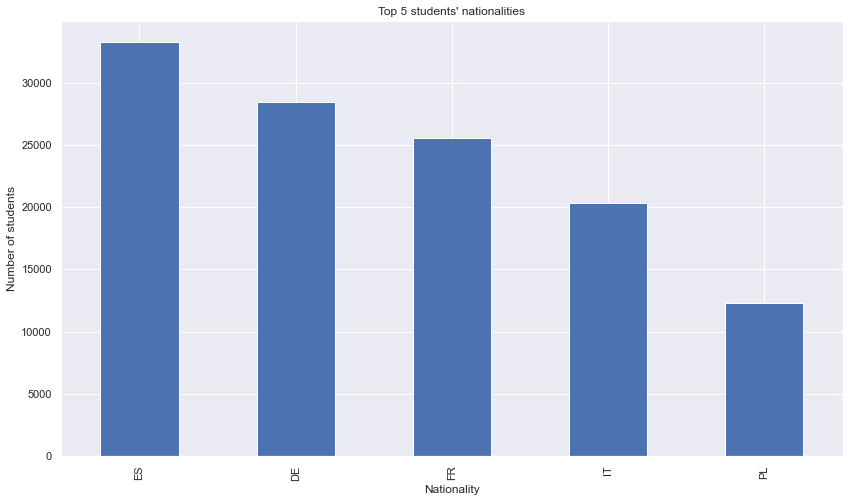

In [34]:
# Top 5 students' nationalities
nationalities = records['NATIONALITY']
top_five_nationalities = nationalities.value_counts()[:5]
top_five_nationalities_percentages = (top_five_nationalities/len(nationalities))*100
print(top_five_nationalities_percentages)

# Plot it
top_five_nationalities.plot(kind='bar', figsize=figsize)
plt.title("Top 5 students\' nationalities")
plt.xlabel('Nationality')
plt.ylabel('Number of students')
plt.show()

#### Subject areas

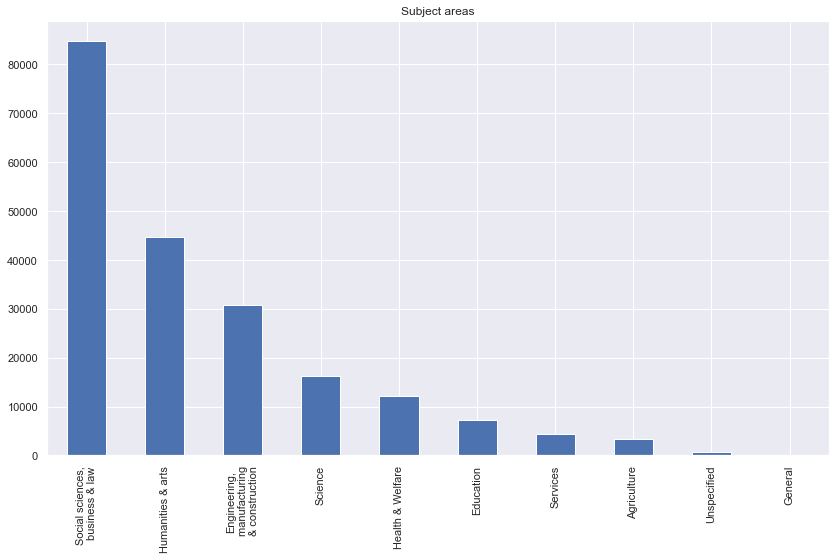

Social sciences,\n business & law                84731
Humanities & arts                                44705
Engineering,\n manufacturing\n & construction    30811
Science                                          16253
Health & Welfare                                 12091
Education                                         7288
Services                                          4313
Agriculture                                       3415
Unspecified                                        670
General                                             29
Name: SUBJECTAREA, dtype: int64


In [35]:
# Draws a bar chart with the study subject areas
# Classification based on the UNESCO'S ISCED: https://en.wikipedia.org/wiki/International_Standard_Classification_of_Education#ISCED_1997_fields_of_education

# Classifies the students' subject areas
subject_areas = records['SUBJECTAREA'].apply(lambda x: int(str(x)[0])) # take only the first digit of the subject area
subject_areas_students = subject_areas.value_counts()

subject_areas_names = 'General', 'Education', 'Humanities & arts', 'Social sciences,\n business & law', 'Science', 'Engineering,\n manufacturing\n & construction', 'Agriculture', 'Health & Welfare', 'Services', 'Unspecified'
subject_areas_students.index = subject_areas_students.index.map({x: y for x, y in enumerate(subject_areas_names)}) # change the index numbers to the corresponding labels
subject_areas_students.plot(kind='bar', figsize=figsize)
plt.title("Subject areas")
plt.show()

print(subject_areas_students)

### Correlations between variables

#### Gender proportion by receiving university

In [36]:
gender_dummies = pd.get_dummies(records['GENDER'])
gender_institutions = records[['HOSTINSTITUTION']].copy()
gender_institutions['M'] = gender_dummies['M']
gender_institutions['F'] = gender_dummies['F']
gender_institutions = gender_institutions.groupby('HOSTINSTITUTION').sum()
gender_institutions['Male percentage'] = 100*gender_institutions['M']/(gender_institutions['M']+gender_institutions['F'])
gender_institutions['Female percentage'] = 100-gender_institutions['Male percentage']

In [37]:
# Get the 30 institutions with the highest male percentage
print("Top 10 highest male percentage")
display(gender_institutions.sort_values('Male percentage', ascending=False)[['Male percentage']][:123])

Top 10 highest male percentage


,Male percentage
HOSTINSTITUTION,
CZ KOLIN01,100.0
F ORSAY02,100.0
D BOCHUM05,100.0
F LYON90,100.0
F MARSEIL06,100.0
...,...
A WIEN68,100.0
RO CLUJNAP02,100.0
NL AMSTERD06,100.0


In [38]:
# Get the 30 institutions with the highest female percentage
print("Top 10 highest female percentage")
gender_institutions.sort_values('Female percentage', ascending=False)[['Female percentage']][:256]

Top 10 highest female percentage


,Female percentage
HOSTINSTITUTION,
DK HADERSL02,100.000000
D BERLIN26,100.000000
F TAHITI01,100.000000
F TOULON18,100.000000
F TOULOUS118,100.000000
...,...
TR GIRESUN01,100.000000
A XX,100.000000
TR ISTANBU32,100.000000


#### Average age by receiving university

In [39]:
# Look for the 10 institutions with the highest average age and the 10 with the lowest
ages_institution = records[['AGE', 'HOSTINSTITUTION']].groupby('HOSTINSTITUTION').mean()

In [40]:
# Get the 10 institutions with the highest average age
print("Top 10 highest average age")
ages_institution.sort_values('AGE', ascending=False)[:10]

Top 10 highest average age


,AGE
HOSTINSTITUTION,
D BUXTEHU02,45.00
I CAMPOBA03,40.00
SK BRATISL06,39.00
HU XX,36.80
UK LONDON122,35.00
I AVELLIN01,35.00
N FYLLING01,34.50
F LIMOGES05,32.25
I TERNI01,32.00


In [41]:
# Get the 10 institutions with the lowest average age
print("Top 10 lowest average age")
ages_institution.sort_values('AGE', ascending=True)[:10]

Top 10 lowest average age


,AGE
HOSTINSTITUTION,
E BARCELO52,18.0
BG BOURGAS01,18.0
E MADRID42,19.0
RO BUCURES31,19.0
BEDE XX,19.0
I PISA03,19.0
I MODENA04,19.0
CZ ZNOJMO01,19.0
F RENNES15,19.0


#### Number of students coming to a country for each student sent abroad

<AxesSubplot:>

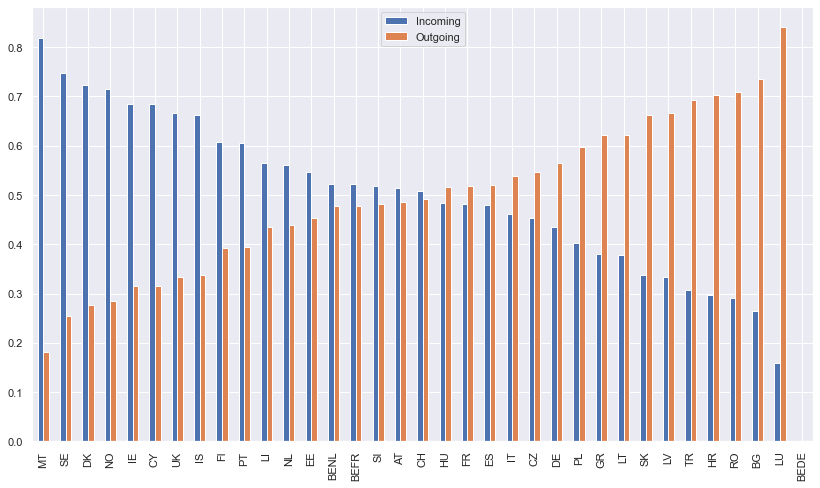

In [42]:
# Compares number of incoming and outgoing students for each country
incoming_countries = records['COUNTRYCODEOFHOSTINSTITUTION'].value_counts()
outgoing_countries = records['COUNTRYCODEOFHOMEINSTITUTION'].value_counts()
countries_ratio = incoming_countries/outgoing_countries

# Plots the data in a bars graphic
incoming_outgoing_countries = pd.DataFrame({'Incoming': incoming_countries/(incoming_countries+outgoing_countries), 'Outgoing': outgoing_countries/(incoming_countries+outgoing_countries), 'Ratio': countries_ratio}).sort_values(ascending=False, by="Ratio").drop(columns="Ratio")
incoming_outgoing_countries.plot(kind='bar', figsize=figsize)

#### Home and host country

<AxesSubplot:xlabel='COUNTRYCODEOFHOSTINSTITUTION', ylabel='COUNTRYCODEOFHOMEINSTITUTION'>

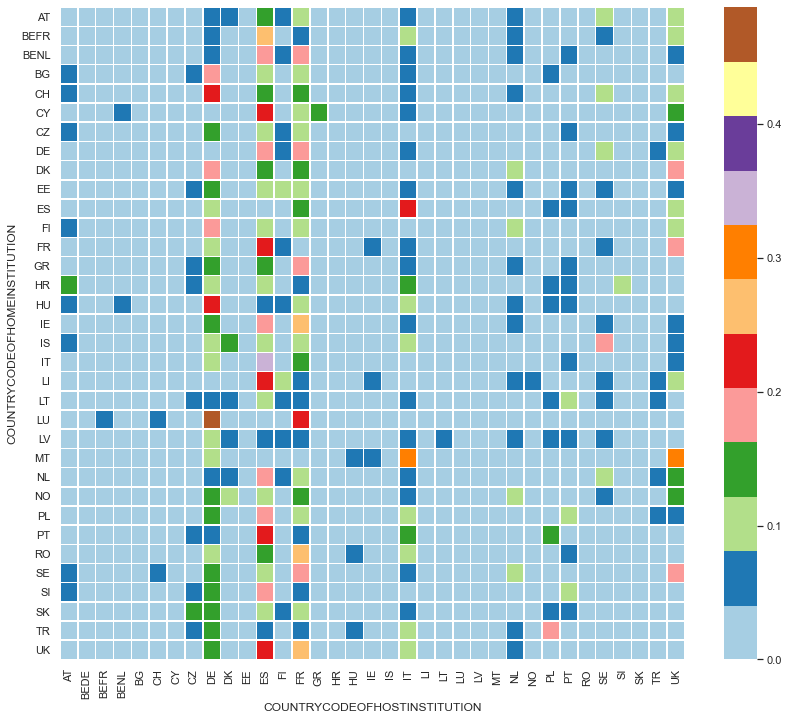

In [43]:
# Create a cross table and normalize it
home_host_countries = pd.crosstab(records['COUNTRYCODEOFHOMEINSTITUTION'], records['COUNTRYCODEOFHOSTINSTITUTION'], normalize='index')

# Plot home vs. destination country
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(home_host_countries, ax=ax, linewidths=.5, cmap='Paired')

From this heatmap we can guess that there are some popular destination countries for some origin countries. Let's check them for one country.

<AxesSubplot:ylabel='ES'>

COUNTRYCODEOFHOSTINSTITUTION
IT    21.348315
FR    12.385954
DE    11.059935
UK     9.431748
PT     6.841318
PL     6.603691
Name: ES, dtype: float64

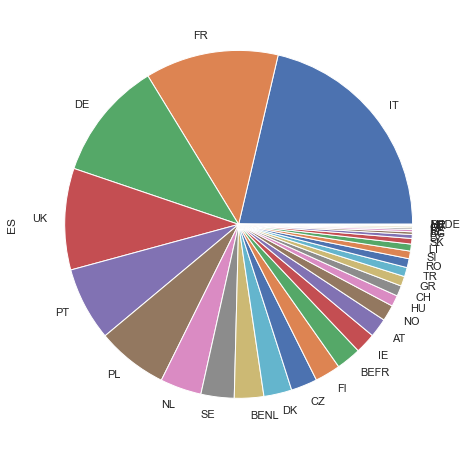

In [44]:
display(home_host_countries.loc['ES'].sort_values(ascending=False).plot(kind='pie', figsize=figsize, normalize=True))
display(100 * home_host_countries.loc['ES'].sort_values(ascending=False).head(6))

If there were no correlation between the home and destination countries, for each home country, each destination country would receive 2.86% of the students. However, both in the heatmap and in the pie chart above, it looks like the entropy for the destination country is quite low. From the pie chart, it looks like Spanish students have a huge preference for Italy (21.3%), France (12.4%), Germany (11.1%), UK (9.4%), Portugal (6.8%) and Poland (6.6%). 

#### Destination and subject area

In [45]:
# Create a pivot table in which each row represents a subject area, and each column a university. The value of the cell (x, y) is the percentage of Erasmus students whose courses are in subject area x that went to university y
destination_subject_area = records[['SUBJECTAREA', 'HOSTINSTITUTION']].copy()
destination_subject_area['SUBJECTAREA_GROUPED'] = destination_subject_area['SUBJECTAREA'].apply(lambda x: str(x)[0])  # get only the first digit
destination_subject_area = destination_subject_area.drop(columns='SUBJECTAREA').rename(columns={'SUBJECTAREA_GROUPED': 'SUBJECTAREA'})
destination_subject_area_pivot = pd.crosstab(destination_subject_area['SUBJECTAREA'], destination_subject_area['HOSTINSTITUTION'], normalize='index')

In [46]:
# For each subject area, find the most popular destination institution and get its percentage
subject_areas_names = 'General', 'Education', 'Humanities & arts', 'Social sciences,\n business & law', 'Science', 'Engineering,\n manufacturing\n & construction', 'Agriculture', 'Health & Welfare', 'Services', 'Unspecified'

for subject_area in destination_subject_area_pivot.index.to_list():
    destinations = destination_subject_area_pivot.loc[subject_area]
    top_destination = destinations.sort_values(ascending=False)
    print(subject_areas_names[int(subject_area)])
    print(100*top_destination.head(5))
    print()

General
HOSTINSTITUTION
NL WAGENIN01    17.241379
S  OREBRO01     13.793103
UK SOUTHAM04    13.793103
TR ANKARA04      6.896552
IRLTRALEE01      6.896552
Name: 0, dtype: float64

Education
HOSTINSTITUTION
I  BOLOGNA01    1.523052
E  GRANADA01    1.289791
DK KOBENHA56    1.166301
S  STOCKHO01    1.125137
E  VALENCI01    1.029089
Name: 1, dtype: float64

Humanities & arts
HOSTINSTITUTION
E  GRANADA01    1.530030
E  SEVILLA01    1.407001
F  PARIS004     1.250419
E  VALENCI01    1.111732
E  MADRID03     1.049100
Name: 2, dtype: float64

Social sciences,
 business & law
HOSTINSTITUTION
E  MADRID03     0.946525
E  VALENCI01    0.889875
E  GRANADA01    0.880433
I  BOLOGNA01    0.774215
E  SEVILLA01    0.633770
Name: 3, dtype: float64

Science
HOSTINSTITUTION
S  LUND01       1.587399
S  UPPSALA01    1.205931
S  STOCKHO04    1.089030
E  GRANADA01    1.082877
E  VALENCI02    0.959823
Name: 4, dtype: float64

Engineering,
 manufacturing
 & construction
HOSTINSTITUTION
E  VALENCI02    2.486125
S  

If the correlation between the subject area and the destination university were null, for each subject area, each destination university would receive 0.04% of the students. However, for most of the subject areas, the institution receiving more students has between a 1% and 3.7%, showing that the entropy between those two variables is not high. The percentages for the "General" category are remarkable, with only three institutions receiving almost the 50% of the students.

#### Sending and receiving countries and monthly grant

In [47]:
# Load the data
receiving_country_grants_df = records[['COUNTRYCODEOFHOSTINSTITUTION', 'COUNTRYCODEOFHOMEINSTITUTION', 'STUDYGRANT', 'LENGTHSTUDYPERIOD']].copy()
receiving_country_grants_df['MONTHLY_GRANT'] = receiving_country_grants_df['STUDYGRANT'] / receiving_country_grants_df['LENGTHSTUDYPERIOD']

Text(0.5, 1.0, 'Grant for each receiving country')

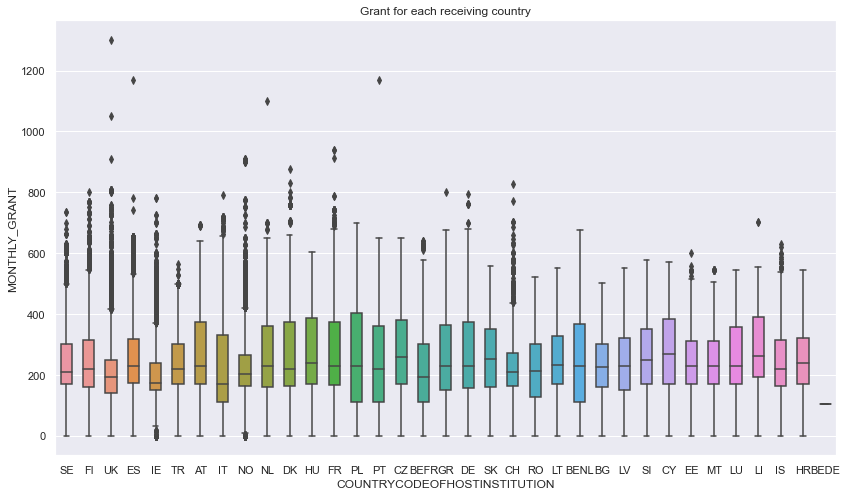

In [48]:
fig, ax = plt.subplots(figsize=figsize)
sns.boxplot(x='COUNTRYCODEOFHOSTINSTITUTION', y='MONTHLY_GRANT', data=receiving_country_grants_df, width=0.5, ax=ax).set_title('Grant for each receiving country')

Text(0.5, 1.0, 'Grant for each sending country')

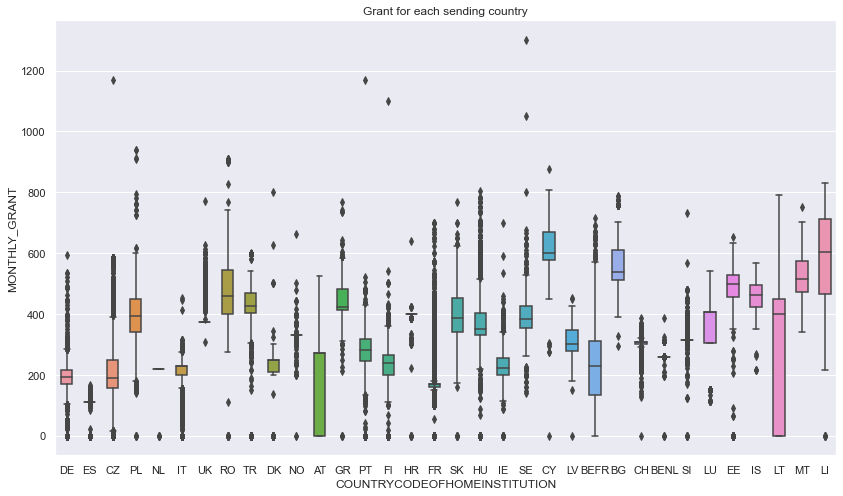

In [49]:
fig, ax = plt.subplots(figsize=figsize)
sns.boxplot(x='COUNTRYCODEOFHOMEINSTITUTION', y='MONTHLY_GRANT', data=receiving_country_grants_df, width=0.5, ax=ax).set_title('Grant for each sending country')

Comparing the two plots, it is evident that the home country is a more deterministic factor than the destination country in the amount of money received by the students. In the first plot, it looks like the average of the monthly grant for each destination country is quite homogenous, and for most of them, the variance is very high, ranging from a 50% to a 150% of the average value, while in the second plot, the variance is really low, and the average grants are very heterogenous.

#### Number of ECTS and months staying

In [50]:
# Correlation index between number of ECTS and months staying
a = records['TOTALECTSCREDITS']
b = records['LENGTHSTUDYPERIOD']
a.corr(b, method="spearman") # Spearman correlation is the most appropiate for this type of data (numeric but not normal distributed)

0.5300518049779913

<AxesSubplot:xlabel='LENGTHSTUDYPERIOD', ylabel='TOTALECTSCREDITS'>

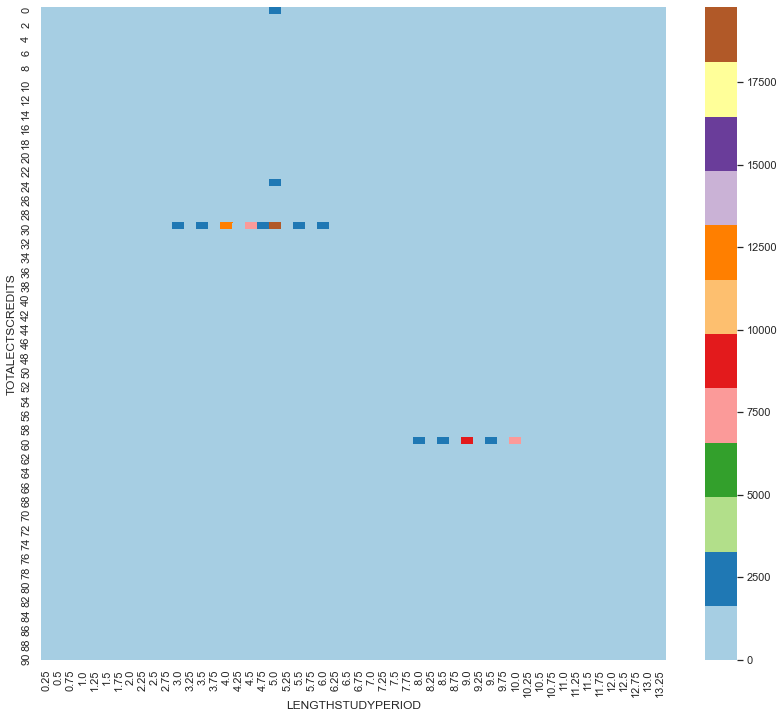

In [51]:
# Plot host institution vs. subject area
import seaborn as sns

f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(pd.crosstab(records['TOTALECTSCREDITS'], records['LENGTHSTUDYPERIOD']), cmap='Paired', ax=ax)

The two compared variables are numeric, then it makes sense to calculate the correlation index using the Spearman approach. The 0.530 index suggests it exists correlation between the number of ECTS and the months staying. In the heatmap we can precisely see that most of the students staying less than 7 months take 30 ECTS, and the ones staying more, 60 ECTS. This can be seen more easily by ploting the distribution of the number of ECTS for the students staying one semester and the ones staying the whole academic year.

In [52]:
number_of_semesters_df = records.copy()[['LENGTHSTUDYPERIOD', 'TOTALECTSCREDITS']]
number_of_semesters_df['NUMBEROFSEMESTERS'] = number_of_semesters_df['LENGTHSTUDYPERIOD'].apply(lambda x: 1 if x < 7.0 else 2)
number_of_semesters_df = number_of_semesters_df.drop(columns='LENGTHSTUDYPERIOD')

<AxesSubplot:xlabel='TOTALECTSCREDITS'>

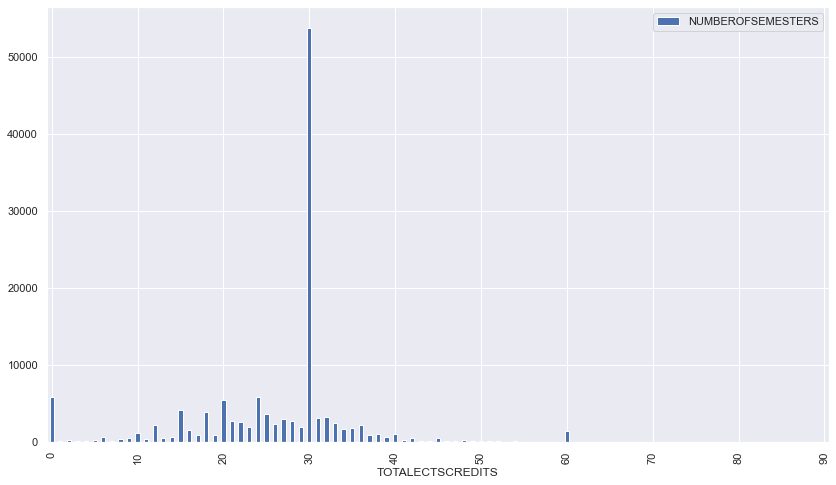

In [53]:
number_of_semesters_df[number_of_semesters_df['NUMBEROFSEMESTERS']==1].groupby('TOTALECTSCREDITS').count().plot(kind='bar', figsize=figsize, xticks=range(0, 100, 10))

<AxesSubplot:xlabel='TOTALECTSCREDITS'>

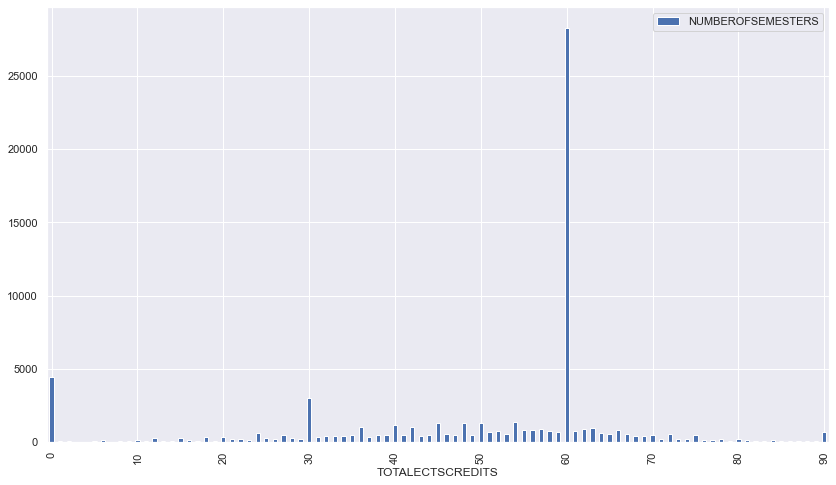

In [54]:
number_of_semesters_df[number_of_semesters_df['NUMBEROFSEMESTERS']==2].groupby('TOTALECTSCREDITS').count().plot(kind='bar', figsize=figsize, xticks=range(0, 100, 10))